In [52]:
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample

warnings.filterwarnings('ignore')


In [10]:
df = pd.read_csv('cleveland-0_vs_4.csv')

In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result
172,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,positive
173,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,positive
174,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,positive
175,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,positive
176,70.0,1.0,4.0,145.0,174.0,0.0,0.0,125.0,1.0,2.6,3.0,0.0,7.0,positive


In [12]:
df["result"]=df.result.replace({'negative':0,'positive':1})
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
age         177 non-null float64
sex         177 non-null float64
cp          177 non-null float64
trestbps    177 non-null float64
chol        177 non-null float64
fbs         177 non-null float64
restecg     177 non-null float64
thalach     177 non-null float64
exang       177 non-null float64
oldpeak     177 non-null float64
slope       177 non-null float64
ca          177 non-null int32
thal        177 non-null int32
result      177 non-null int64
dtypes: float64(11), int32(2), int64(1)
memory usage: 18.1 KB


In [28]:
for sutun_adi in df.columns:
    print("{} sütunundaki benzersiz değerler : {}".format(sutun_adi, df[sutun_adi].unique()))

age sütunundaki benzersiz değerler : [63. 37. 41. 56. 57. 44. 52. 54. 48. 49. 64. 58. 50. 66. 69. 59. 42. 61.
 71. 51. 65. 53. 46. 45. 39. 47. 62. 34. 35. 29. 43. 55. 60. 67. 68. 74.
 76. 70. 38. 40. 77.]
sex sütunundaki benzersiz değerler : [1. 0.]
cp sütunundaki benzersiz değerler : [1. 3. 2. 4.]
trestbps sütunundaki benzersiz değerler : [145. 130. 120. 140. 172. 110. 150. 135. 160. 105. 125. 142. 155. 104.
 138. 128. 108. 134. 115. 118. 100. 124.  94. 122. 112. 102. 152. 101.
 132. 148. 129. 180. 136. 126. 106. 156. 170. 178. 146. 165. 114.]
chol sütunundaki benzersiz değerler : [233. 250. 204. 236. 354. 192. 294. 263. 199. 239. 275. 266. 211. 283.
 219. 340. 226. 234. 243. 302. 212. 175. 417. 197. 198. 177. 273. 213.
 304. 232. 269. 360. 308. 245. 208. 321. 325. 235. 257. 216. 256. 231.
 141. 252. 201. 260. 182. 303. 265. 309. 203. 183. 222. 220. 209. 258.
 227. 261. 221. 205. 240. 318. 298. 564. 277. 214. 248. 255. 207. 223.
 288. 160. 394. 315. 246. 244. 195. 196. 254. 126. 313. 

In [30]:
df["ca"]= df["ca"].replace("<null>", 'Nan' )
df["thal"]= df["thal"].replace("<null>", 'Nan' )
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,6,0


In [31]:
df['ca'] = df['ca'].astype(int)
df['thal'] = df['thal'].astype(int)

In [32]:
df.fillna(df.mean(), inplace=True)

Kalp Krizi Oranı : %7.34
Risk Yok      : %92.66


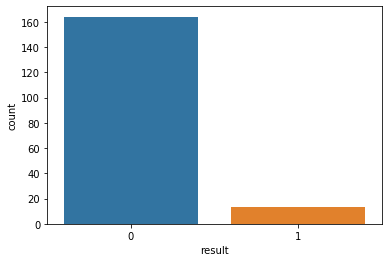

In [36]:
sns.countplot(df.result)
print("Kalp Krizi Oranı : %{:.2f}".format(sum(df.result)/len(df.result)*100))
print("Risk Yok      : %{:.2f}".format((len(df.result)-sum(df.result))/len(df.result)*100))

In [34]:
def model_olustur(X, y):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [35]:
X = df.drop('result', axis=1)
y = df['result']
model_olustur(X,y)


Modelin doğruluk değeri :  0.9166666666666666
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       131
           1       0.89      0.80      0.84        10

    accuracy                           0.98       141
   macro avg       0.94      0.90      0.92       141
weighted avg       0.98      0.98      0.98       141

Test veri kümesi
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.50      0.33      0.40         3

    accuracy                           0.92        36
   macro avg       0.72      0.65      0.68        36
weighted avg       0.90      0.92      0.91        36



In [42]:
Kalp_krizi = df[df.result == 1]
Risk_yok = df[df.result == 0]

Kalp_krizi_artırılmış = resample(Kalp_krizi,
                                     replace = True,
                                     n_samples = len(Risk_yok),
                                     random_state = 111)

artırılmıs_df = pd.concat([ Kalp_krizi_artırılmış,Risk_yok])
artırılmıs_df.result.value_counts()

1    164
0    164
Name: result, dtype: int64

In [43]:
X = artırılmıs_df.drop('result', axis=1)
y = artırılmıs_df['result']
model_olustur(X,y)

Modelin doğruluk değeri :  0.9696969696969697
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



In [47]:
Kalp_krizi = df[df.result == 1]
Risk_yok = df[df.result == 0]

Kalp_krizi_azaltılmış = resample(Risk_yok,
                                     replace = True,
                                     n_samples = len(Kalp_krizi),
                                     random_state = 111)

azaltılmış_df = pd.concat([Kalp_krizi, Kalp_krizi_azaltılmış])
azaltılmış_df.result.value_counts()

1    13
0    13
Name: result, dtype: int64

In [49]:
X = azaltılmış_df.drop('result', axis=1)
y = azaltılmış_df['result']
model_olustur(X,y)

Modelin doğruluk değeri :  1.0
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [54]:
y = df.result
X = df.drop('result', axis=1)

sm = SMOTE(random_state=27)
X_smote, y_smote = sm.fit_sample(X, y)

In [55]:
model_olustur(X_smote, y_smote)

Modelin doğruluk değeri :  0.9696969696969697
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



In [56]:
y = df.result
X = df.drop('result', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [57]:
model_olustur(X_adasyn, y_adasyn)

Modelin doğruluk değeri :  0.9393939393939394
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       131
           1       0.95      0.98      0.97       132

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263

Test veri kümesi
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.91      0.97      0.94        33

    accuracy                           0.94        66
   macro avg       0.94      0.94      0.94        66
weighted avg       0.94      0.94      0.94        66

